In [10]:
library('RODBC')
library('quantmod')
library('PerformanceAnalytics')
library('extrafont')

In [11]:
source("/usr/common/config.R")
lcon <- odbcDriverConnect(sprintf("Driver={SQL Server};Server=%s;Database=%s;Uid=%s;Pwd=%s;", ldbserver, ldbname, ldbuser, ldbpassword), case = "nochange", believeNRows = TRUE)

In [12]:
indices<-sqlQuery(lcon, "select index_name, min(time_stamp), max(time_stamp) from bhav_index group by index_name")
indices[,2]<-as.Date(indices[,2])
indices[,3]<-as.Date(indices[,3])

#print(indices)

iXts<-xts()
indexNames<-c()

for(i in 1:length(indices[,1])){
    indexName<-toString(indices[i,1])
    closingPx<-sqlQuery(lcon, sprintf("select px_close, time_stamp from bhav_index 
                                    where index_name='%s'", indexName))
    
    if(length(closingPx[,1]) < 1000)
        next
        
    iXts<-merge(iXts, dailyReturn(xts(closingPx[,1], as.Date(closingPx[,2]))))
    indexNames<-c(indexNames, indexName)
}

names(iXts)<-indexNames
print(indexNames)

Warning message in dimnames(x) <- dn:
“closing unused RODBC handle 1”

 [1] "NIFTY 100"                 "NIFTY 200"                
 [3] "NIFTY 50"                  "NIFTY 50 ARBITRAGE"       
 [5] "NIFTY 50 FUTURES INDEX"    "NIFTY 50 FUTURES TR INDEX"
 [7] "NIFTY 50 TR"               "NIFTY 500"                
 [9] "NIFTY ADITYA BIRLA GROUP"  "NIFTY ALPHA 50"           
[11] "NIFTY AUTO"                "NIFTY BANK"               
[13] "NIFTY COMMODITIES"         "NIFTY CONSUMPTION"        
[15] "NIFTY CPSE"                "NIFTY DIV OPPS 50"        
[17] "NIFTY DIVIDEND"            "NIFTY ENERGY"             
[19] "NIFTY FIN SERVICE"         "NIFTY FMCG"               
[21] "NIFTY FULL MIDCAP 100"     "NIFTY FULL SMALLCAP 100"  
[23] "NIFTY GROWSECT 15"         "NIFTY HIGH BETA 50"       
[25] "NIFTY INFRA"               "NIFTY IT"                 
[27] "NIFTY LOW VOLATILITY 50"   "NIFTY MAHINDRA GROUP"     
[29] "NIFTY MEDIA"               "NIFTY METAL"              
[31] "NIFTY MID LIQ 15"          "NIFTY MID100 FREE"        
[33] "NIFTY MIDCAP 150" 

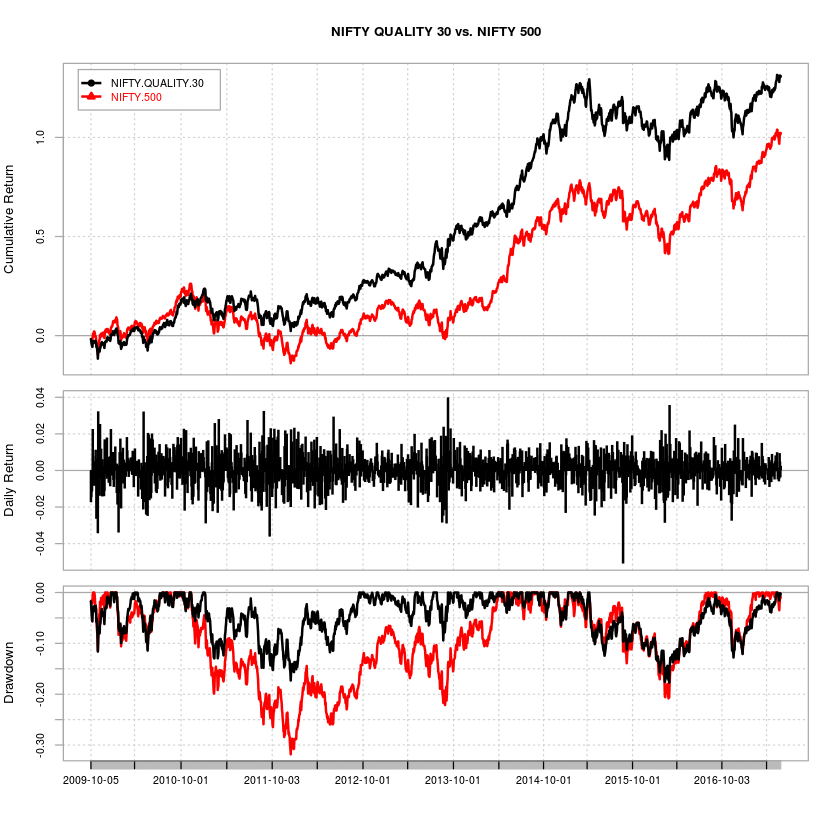

In [15]:
dailyRets<-na.omit(merge(iXts[,'NIFTY QUALITY 30'], iXts[,'NIFTY 500']))

charts.PerformanceSummary(dailyRets[-1,], main='NIFTY QUALITY 30 vs. NIFTY 500')

In [14]:
100*Return.cumulative(dailyRets[,1])
100*Return.cumulative(dailyRets[,2])

100*Return.annualized(dailyRets[,1])
100*Return.annualized(dailyRets[,2])

,NIFTY QUALITY 30
Cumulative Return,130.945


,NIFTY 500
Cumulative Return,102.2252


,NIFTY QUALITY 30
Annualized Return,11.73452


,NIFTY 500
Annualized Return,9.784768
